# Prediction using Unsupervised Learning 

# The Spark Foundation

In [284]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from scipy.stats import zscore
from sklearn.cluster import KMeans
%matplotlib inline

In [285]:
df = pd.read_csv(r'C:\Users\aishw\Downloads\iris data.csv')

In [286]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [287]:
df.shape

(150, 6)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [289]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [290]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [291]:
#drop id column
df = df.drop(['Id'], axis = 1)

In [292]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='SepalLengthCm'>

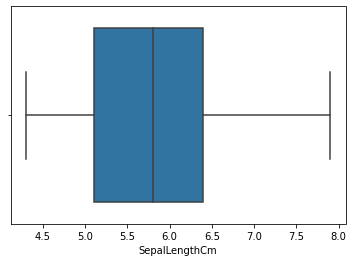

In [293]:
# Checking outliers
sns.boxplot(x=df['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

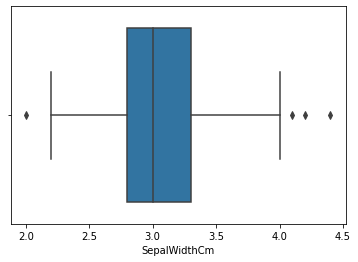

In [294]:
sns.boxplot(x=df['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm'>

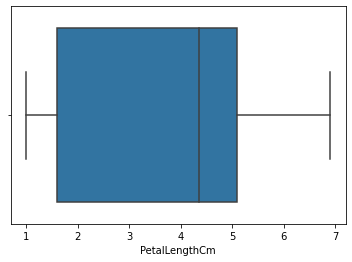

In [295]:
sns.boxplot(x=df['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm'>

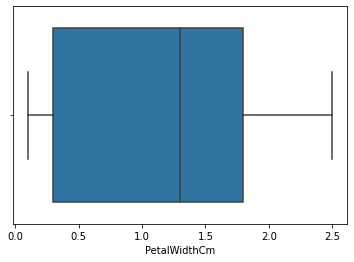

In [296]:
sns.boxplot(x=df['PetalWidthCm'])

In [302]:
# Now we can see that Sepal width contain outliers. We have to remove that outliers by using IQR method
#First Quartile
Q1 = df.quantile(0.25)
#Third Quartile
Q3 = df.quantile(0.75)
#Formula for IQR is
IQR = Q3-Q1
df1 = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 - 1.5*IQR))).any(axis=1)]
df1 = df.reset_index(drop=True)

In [305]:
#Scaling before clustering
X = df1.iloc[:,0:4]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [306]:
# Scale feature with standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x_scaled = pd.DataFrame(x,columns=X.columns)
x_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


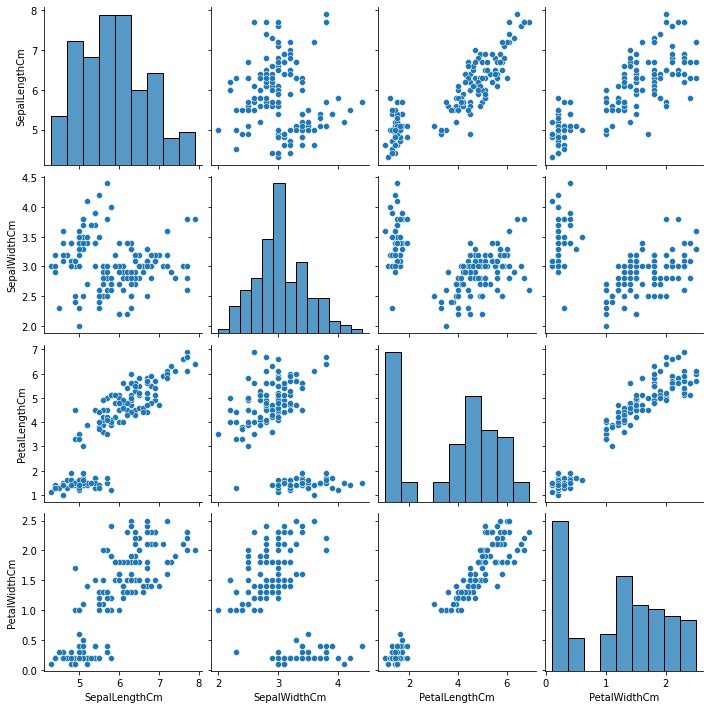

In [307]:
sns.pairplot(data = df)

In [308]:
#Perform thw KMeans clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 101)

In [309]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters = num_clusters,init='k-means++', random_state =1)
    kmeans.fit(x_scaled)
    cluster_errors.append(kmeans.inertia_)
cluster_df = pd.DataFrame({'Num_Clusters':cluster_range,'Inertia':cluster_errors})
cluster_df

,Num_Clusters,Inertia
0,1,600.000000
1,2,223.732006
2,3,140.968379
3,4,114.613539
4,5,91.075639
5,6,80.230607
6,7,72.456918
7,8,62.871570
8,9,54.672713
9,10,47.752485


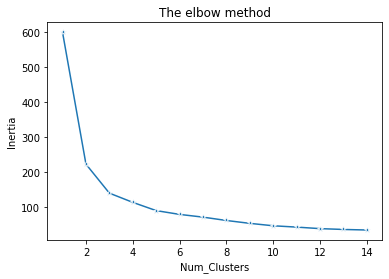

In [310]:
#Finding the optimum number of clusters for k-means classification
sns.lineplot(x= cluster_df['Num_Clusters'],y=cluster_df['Inertia'],marker='*')
plt.title('The elbow method')
plt.xlabel('Num_Clusters')
plt.ylabel('Inertia') 
plt.show()

In [311]:
#train the algorithm
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [312]:
# Calculate the observed value
#create a dataframe
df_labels = pd.DataFrame(kmeans.labels_,columns=list(['Label']))
df_labels['Label'] = df_labels['Label'].astype('object')

In [313]:
df_labels.head()

,Label
0,1
1,1
2,1
3,1
4,1


In [314]:
##join label with iris dataset
df1 = df.join(df_labels)

In [315]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [316]:
#compare actual and observed
print('Observed value')
print(df1['Label'].value_counts())

print('Actual value')
print(df['Species'].value_counts())

Observed value
2    53
1    50
0    47
Name: Label, dtype: int64
Actual value
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


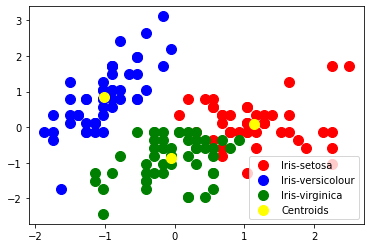

In [317]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()